# Clustering

* Process of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups;

* Goal: find similarities in the data points and group similar data points together;

    - Infer a function that describes the structure of "unlabeled" data.
    
    - Gain some valuable insights from our data by seeing what groups the data points fall into when we apply a clustering algorithm;

# K-Means

- 1) Select a number of classes/groups to use and randomly initialize their respective center points;
- 2) Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it;
- 3) Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group;
- 4) Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations.


![](https://cdn-images-1.medium.com/max/1800/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Generating data

In [4]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=10)

In [5]:
points = data[0]
labels = data[1]

<IPython.core.display.Javascript object>


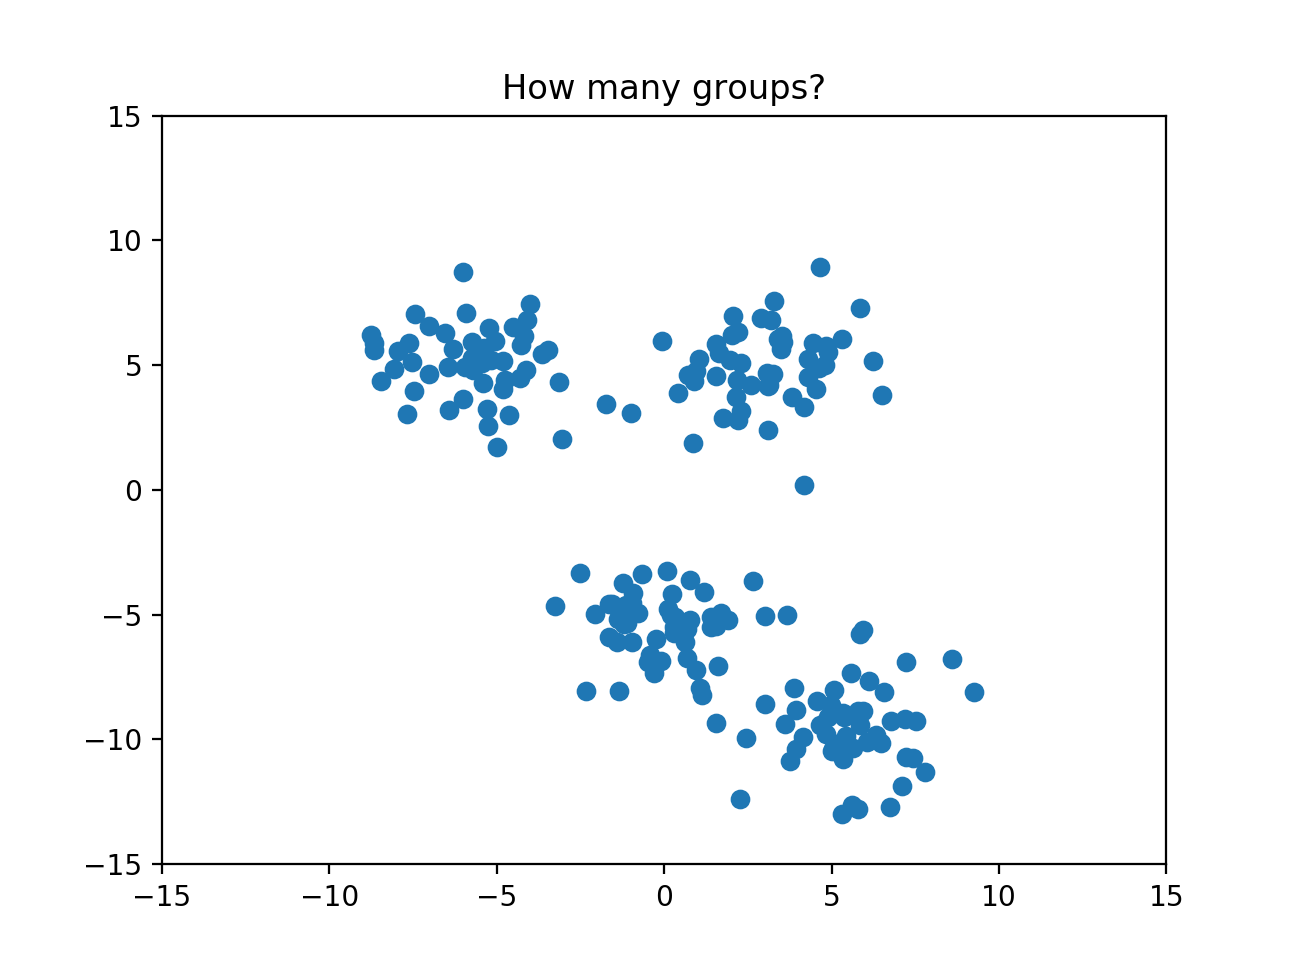

In [6]:
plt.figure()
plt.title('How many groups?')
plt.scatter(points[:,0], points[:,1])
plt.axis([-15, 15, -15, 15])
plt.show()

<IPython.core.display.Javascript object>


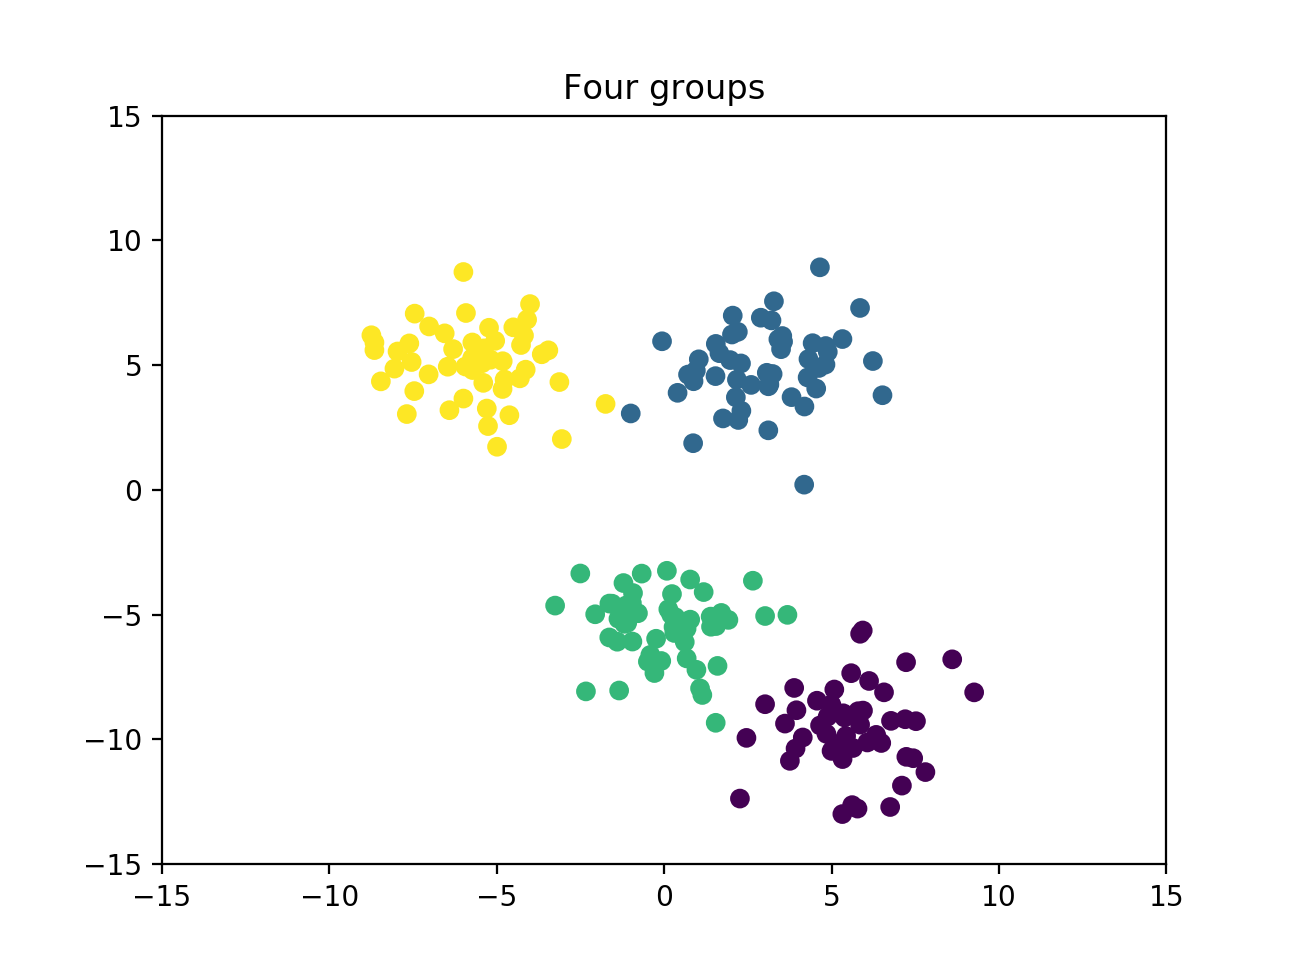

In [7]:
plt.figure()
plt.title('Four groups')
plt.scatter(points[:,0], points[:,1], c=labels)
plt.axis([-15, 15, -15, 15])
plt.show()

### Applying K-Means

In [8]:
kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=20)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=20, tol=0.0001, verbose=0)

In [9]:
centers = kmeans.cluster_centers_
predicted_labels = kmeans.predict(points)

<IPython.core.display.Javascript object>


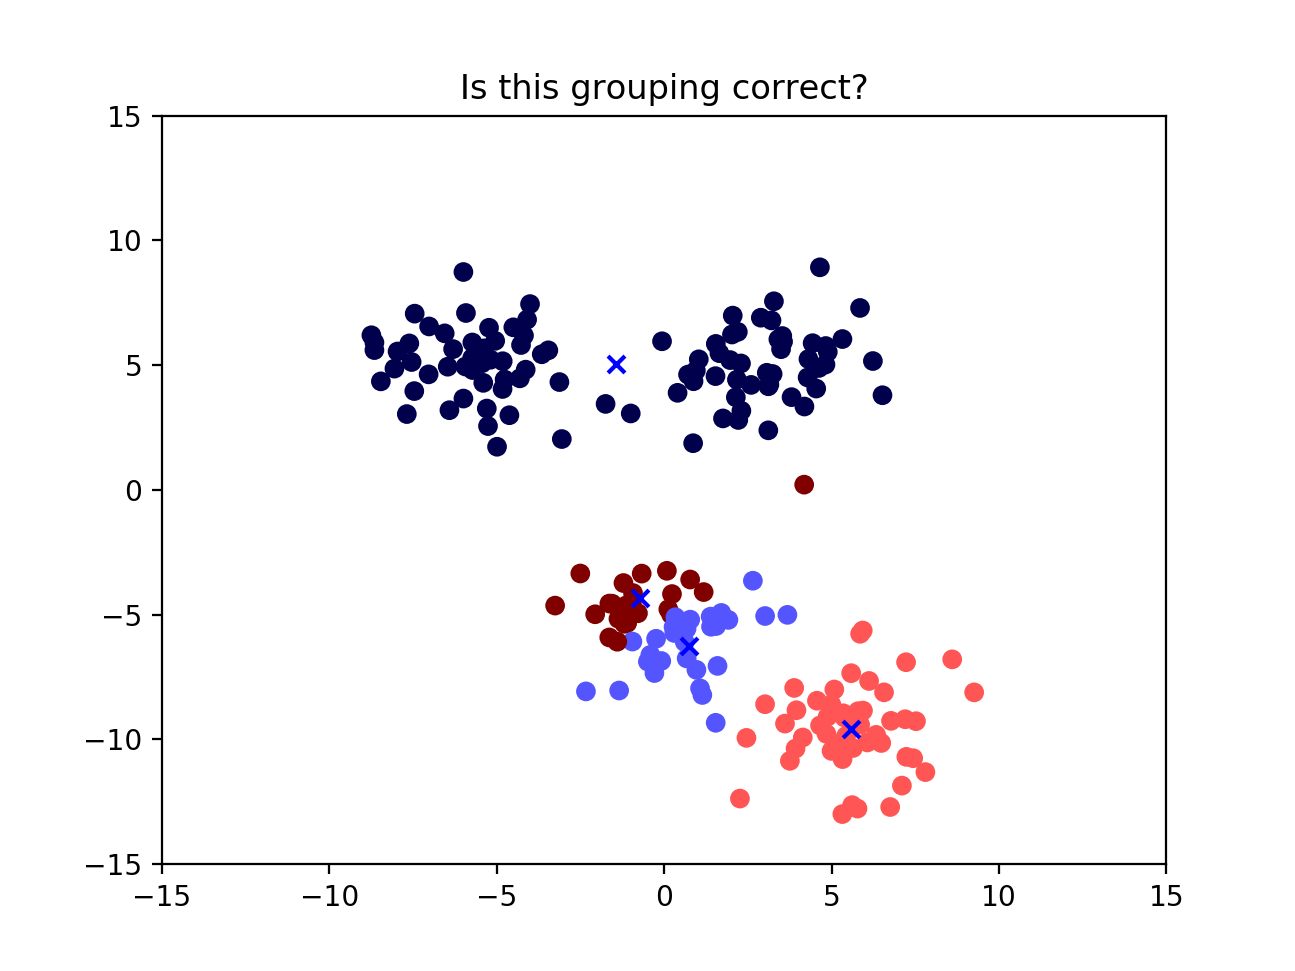

In [12]:
plt.figure()
plt.title('Is this grouping correct?')
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='seismic')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

### Problems
   - 1) Have to select how many groups/classes there are;
   - 2) Starts with a random choice of cluster centers and therefore it may yield different clustering results on different runs of the algorithm
    

### 1) Elbow Method

In [50]:
kmeans = []
distances = []

for k in range(1, 10):
    kmeans.append(KMeans(n_clusters=k, init='random', n_init=10, random_state=0))
    kmeans[k-1].fit(points)
    distances.append(-kmeans[k-1].score(points))

<IPython.core.display.Javascript object>


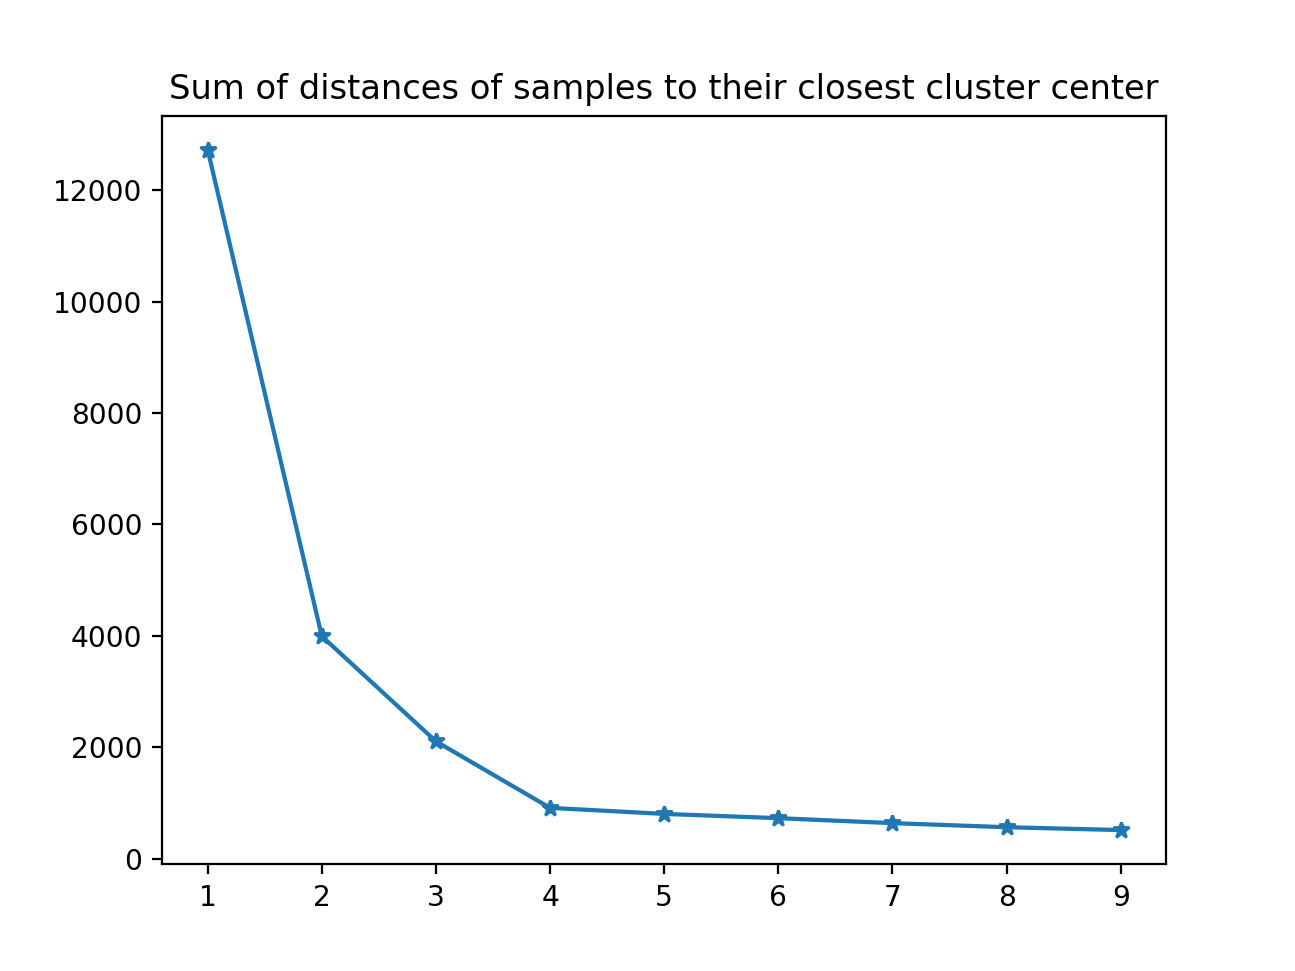

In [53]:
plt.figure()
plt.title('Sum of distances of samples to their closest cluster center')
plt.plot(range(1, 10), distances, '-*')
plt.show()

### 2) Applying K-Means 10 times

The final results will be the best output of `n_init` consecutive runs in terms of inertia

In [15]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10, random_state=0)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
centers = kmeans.cluster_centers_
predicted_labels = kmeans.predict(points)

<IPython.core.display.Javascript object>


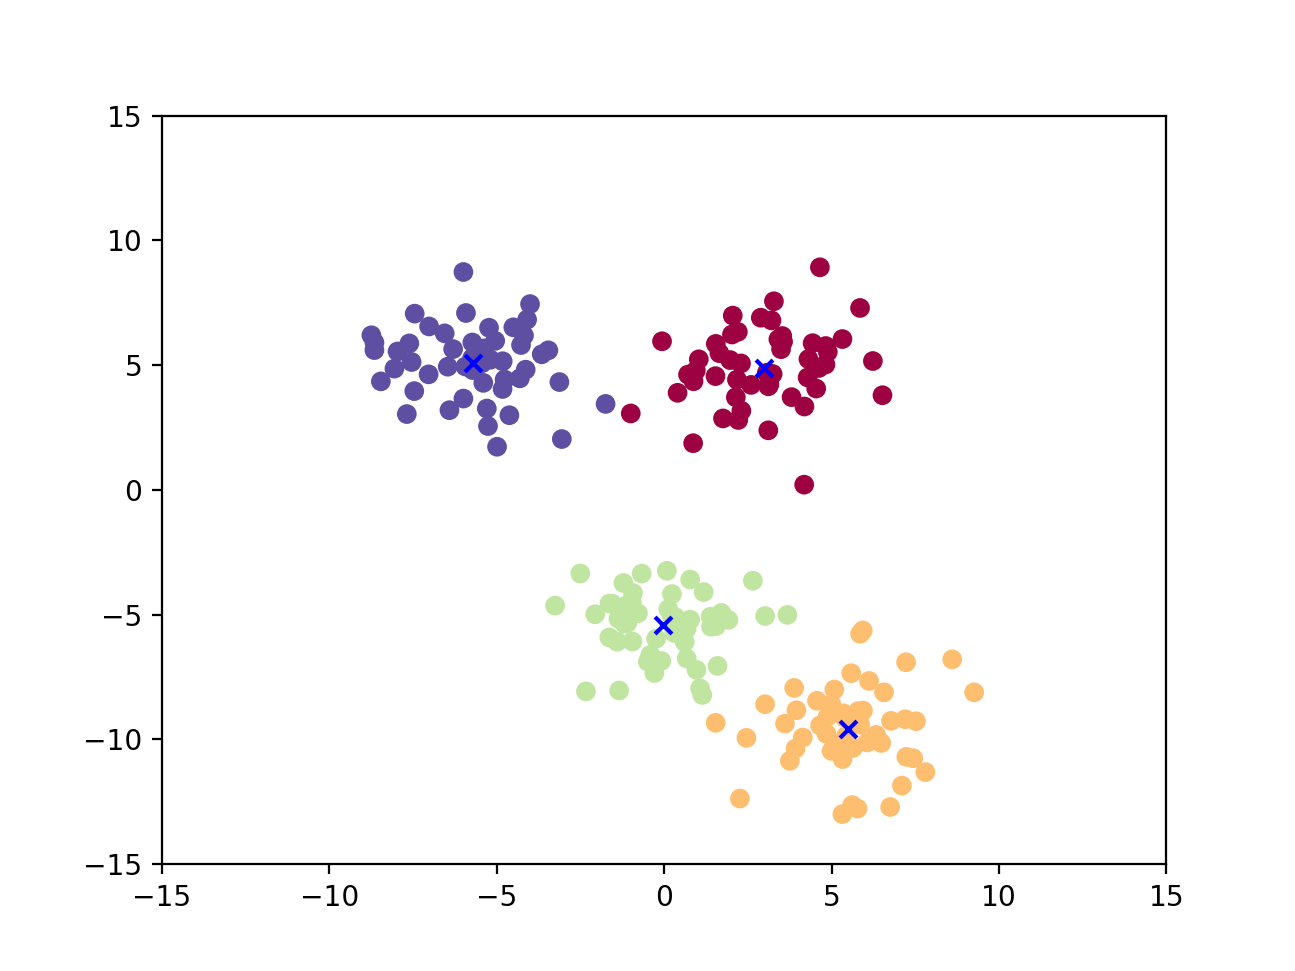

In [17]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

#### Done!